In [1]:
%matplotlib qt

In [2]:
import matplotlib as mpl
import sys
sys.path.append("/Users/yao/Smilei")
import happi
import numpy as np
import matplotlib.pyplot as plt

jetcmap = plt.cm.get_cmap("jet", 9) #generate a jet map with 10 values "rainbow", "jet", YlOrRd
jet_vals = jetcmap(np.arange(9)) #extract those values as an array 
jet_vals[0] = [1.0, 1, 1.0, 1] #change the first value 
jet_vals[8] = [0.0, 0, 0.0, 1] #change the first value 
newcmap = mpl.colors.LinearSegmentedColormap.from_list("mine", jet_vals) 

from matplotlib import font_manager

font_dirs = ['/Users/yao/Documents/Calibri and Cambria Fonts/']
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
    font_manager.fontManager.addfont(font_file)

# set font
plt.rcParams['font.family'] = 'Calibri'

plt.rc('text', usetex=False)
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)
plt.rc('axes', labelsize=14)
plt.rc('legend', fontsize=12)

/var/folders/2t/97rc3fl92tg15k2l_4sk5hsh0000gn/T/ipykernel_21099/621321092.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  jetcmap = plt.cm.get_cmap("jet", 9) #generate a jet map with 10 values "rainbow", "jet", YlOrRd


In [3]:
wkdir = [
     '/Users/yao/Documents/Data/ELI2025/eli_Aug27_2um/',
     '/Users/yao/Desktop/eli_Sep05_2um/',
    ]

In [4]:
S0 = happi.Open(wkdir[0], reference_angular_frequency_SI = 2.0*np.pi*3e8/(0.810*1e-6))
S1 = happi.Open(wkdir[1], reference_angular_frequency_SI = 2.0*np.pi*3e8/(0.810*1e-6))

I_0 = 1.5e+21 W/cm2
a_0 =  26.88270100135983
Loaded simulation '/Users/yao/Documents/Data/ELI2025/eli_Aug27_2um/'
Scanning for Scalar diagnostics
Scanning for Field diagnostics
Scanning for Probe diagnostics
Scanning for ParticleBinning diagnostics
Scanning for RadiationSpectrum diagnostics
Scanning for Performance diagnostics
Scanning for Screen diagnostics
Scanning for Tracked particle diagnostics
Scanning for new particle diagnostics
I_0 = 1.5e+21 W/cm2
a_0 =  26.88270100135983
Loaded simulation '/Users/yao/Desktop/eli_Sep05_2um/'
Scanning for Scalar diagnostics
Scanning for Field diagnostics
Scanning for Probe diagnostics
Scanning for ParticleBinning diagnostics
Scanning for RadiationSpectrum diagnostics
Scanning for Performance diagnostics
Scanning for Screen diagnostics
Scanning for Tracked particle diagnostics
Scanning for new particle diagnostics


In [5]:
# prepare constants, units

me = 9.1e-31
mp = 1836.*me
qe = 1.6e-19
ep = 8.9e-12  # epsilon_0
c  = 3.0e8
wr = S0.namelist.wr
de = c / wr
Lx = S0.namelist.Lsim[0].real / 2 / np.pi      # in um
dx = Lx/S0.namelist.resx           # in mm

Te = S0.namelist.temp_e * 511.e3             # in eV
ne = 1e20 #S0.namelist.n0                              # in cm-3
ld = 7.43e2 * Te**0.5 * ne**(-0.5) * 10. # in mm
dt = S0.namelist.Tsim / S0.namelist.rest

B0 = S0.namelist.B0 * (me * wr / qe)
wc = qe * B0 / me
print("B0 = ", B0)

B0 =  20.0


In [6]:
nume0 = np.array(S0.Screen(0, units=['fs','um','1/cm^3','MeV'],).getData()[-1])
ekine0 = np.array(S0.Screen(0, units=['fs','um','1/cm^3','MeV'],).getAxis('ekin'))

nume1 = np.array(S1.Screen(0, units=['fs','um','1/cm^3','MeV'],).getData()[-1])
ekine1 = np.array(S1.Screen(0, units=['fs','um','1/cm^3','MeV'],).getAxis('ekin'))

In [7]:
np.savetxt("/Users/yao/Desktop/e_spectrum_2um_num.txt", nume1*3e13)
np.savetxt("/Users/yao/Desktop/e_spectrum_2um_ene.txt", ekine1)

In [ ]:
## estimate the total number of electrons

import numpy as np
from scipy import integrate          # only needed for Simpson
E     = ekine1        # MeV
dNdE  = nume1*3e13   # electrons per MeV

N_trapz  = np.trapz(dNdE, E)         # 6.153e13
# N_simps  = integrate.simps(dNdE, E)  # 5.157e13  (optional)

print(f"N_total (trapz)  = {N_trapz:.3e}")
# print(f"N_total (Simpson)= {N_simps:.3e}")

N_total (trapz)  = 2.181e+11


/var/folders/2t/97rc3fl92tg15k2l_4sk5hsh0000gn/T/ipykernel_71699/1784141462.py:8: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  N_trapz  = np.trapz(dNdE, E)         # 6.153e13


In [7]:
S1.ParticleBinning(9, units=['fs','um','1/cm^3','MeV','MeV cm^-3'],
                   data_log='True',
                   cmap=newcmap,
                #    ymin=0,ymax=50,
                   vmin=16,
                   vmax=22,
                   aspect=1.0,
                #    xmin=0,xmax=32,
                #    ymin=-200,ymax=600,
                #    aspect='auto',
                #    layout='tight',
                   sum={'ekin':[0,1]},
                  #  sum={'ekin':[10,100]},
                     # sum={'y':'all'},
                  ).slide()


#9 - Energy density of species # 1,2,4
    x from 0 to 1005.31 in 200 steps 
    y from 0 to 1005.31 in 200 steps 
    ekin from 0 to 2 in 2 steps  [ INCLUDING EDGES ] 

average at ekin = [0.5] K_r
The value in each bin is the sum of the `deposited_quantity` divided by the bin size



In [15]:
S1.ParticleBinning(9, units=['fs','um','1/cm^3','MeV','MeV cm^-3'],).getTimes()[56]
# we choose time = 268 fs, which is the #56

np.float64(268.16603773584905)

In [9]:
# total electron density

ne = S1.ParticleBinning('#1+#2', units=['fs','um','1/cm^3','MeV','MeV cm^-3'],
                        data_log=True,
                        cmap=newcmap,
                        vmin=16,
                        vmax=23,
                        ).slide()
# .getData()[56]

# ne_arr = np.array(ne)


#1 - Number density of species # 1,2
    x from 0 to 1005.31 in 400 steps 
    y from 0 to 1005.31 in 400 steps 

#2 - Number density of species # 4
    x from 0 to 1005.31 in 400 steps 
    y from 0 to 1005.31 in 400 steps 

Operation : #1+#2
The value in each bin is the sum of the `deposited_quantity` divided by the bin size



/Users/yao/Smilei/happi/_Diagnostics/Diagnostic.py:857: RuntimeWarning: divide by zero encountered in log10
  return self._np.log10( self._dataLinAtTime(t) )


In [19]:
S1.ParticleBinning("#1+#2", units=['fs','um','1/cm^3','MeV','MeV cm^-3'],
                   data_log='True',
                   cmap=newcmap,
                #    ymin=0,ymax=50,
                   vmin=16,
                   vmax=22,
                   aspect=1.0,
                #    xmin=0,xmax=32,
                #    ymin=-200,ymax=600,
                #    aspect='auto',
                #    layout='tight',
                  #  sum={'ekin':[0,1]},
                #    sum={'ekin':[10,100]},
                     # sum={'y':'all'},
                  ).slide()


#1 - Number density of species # 1,2
    x from 0 to 1005.31 in 400 steps 
    y from 0 to 1005.31 in 400 steps 

#2 - Number density of species # 4
    x from 0 to 1005.31 in 400 steps 
    y from 0 to 1005.31 in 400 steps 

Operation : #1+#2
The value in each bin is the sum of the `deposited_quantity` divided by the bin size



/Users/yao/Smilei/happi/_Diagnostics/Diagnostic.py:857: RuntimeWarning: divide by zero encountered in log10
  return self._np.log10( self._dataLinAtTime(t) )


In [23]:
bin1 = S1.ParticleBinning("#7+#8", units=['fs','um','1/cm^3','MeV','MeV cm^-3'],
                   data_log='True',
                   cmap=newcmap,
                #    ymin=0,ymax=50,
                #    vmin=16,
                #    vmax=22,
                #    aspect=1.0,
                #    xmin=0,xmax=32,
                #    ymin=-200,ymax=600,
                #    aspect='auto',
                #    layout='tight',
                  #  sum={'ekin':[0,1]},
                #    sum={'ekin':[10,100]},
                     # sum={'y':'all'},
                  )#.slide()

scr1 = S1.Screen(0, units=['fs','um','1/cm^3','MeV'],data_log='True',)

happi.multiSlide(bin1, scr1)

/Users/yao/Smilei/happi/_Diagnostics/Diagnostic.py:857: RuntimeWarning: divide by zero encountered in log10
  return self._np.log10( self._dataLinAtTime(t) )


In [12]:
num=80

ene = S0.ParticleBinning(9, units=['fs','um','1/cm^3','MeV','MeV cm^-3'],
                        #  sum={'ekin':[0,1]},
                         sum={'ekin':[1,4.0]},
                         ).getData()[num]

ene_arr = np.array(ene)

ne = S0.ParticleBinning('#1+#2', units=['fs','um','1/cm^3','MeV','MeV cm^-3'],).getData()[num]

ne_arr = np.array(ne)

/var/folders/2t/97rc3fl92tg15k2l_4sk5hsh0000gn/T/ipykernel_18644/1303387423.py:11: RuntimeWarning: divide by zero encountered in divide
  e_arr = ene_arr / ne_arr[::2,::2]
/var/folders/2t/97rc3fl92tg15k2l_4sk5hsh0000gn/T/ipykernel_18644/1303387423.py:11: RuntimeWarning: invalid value encountered in divide
  e_arr = ene_arr / ne_arr[::2,::2]


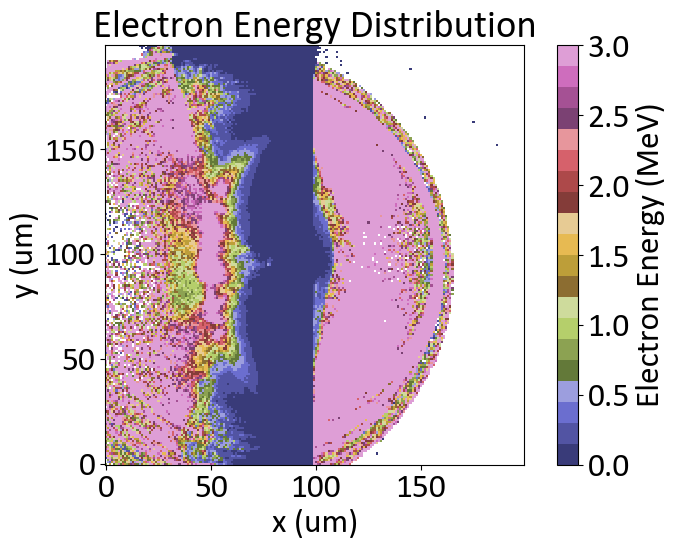

In [18]:
plt.rcParams.update({
    'font.family': 'Calibri',
    'font.size': 24,
    'axes.titlesize': 28,
    'axes.labelsize': 24,
    'legend.fontsize': 16,
    'xtick.labelsize': 24,
    'ytick.labelsize': 24
})

e_arr = ene_arr / ne_arr[::2,::2]

plt.figure(figsize=(8, 6))
plt.imshow((e_arr.T), aspect='equal', 
           cmap='tab20b', 
           interpolation='none',
           origin='lower',
        #    extent=[0,400,0,400],
           vmin=0.0, vmax=3,
           )
plt.xlabel('x (um)')
plt.ylabel('y (um)')
# plt.xlim([75, 175])
# plt.ylim([160, 240])
plt.title('Electron Energy Distribution')
plt.colorbar(label='Electron Energy (MeV)')
plt.tight_layout()

In [16]:
S1.ParticleBinning("#9/(#1+#2)", units=['fs','um','1/cm^3','MeV','MeV cm^-3'],
                   data_log='True',
                   cmap=newcmap,
                #    ymin=0,ymax=50,
                #    vmin=16,
                #    vmax=22,
                   aspect=1.0,
                #    xmin=0,xmax=32,
                #    ymin=-200,ymax=600,
                #    aspect='auto',
                #    layout='tight',
                  #  sum={'ekin':[0,1]},
                   sum={'ekin':[10,100]},
                     # sum={'y':'all'},
                  ).slide()

Exception: All diagnostics in operation '#9/(#1+#2)' must have as many axes. ParticleBinning #9 has 3 axes and #1 has 2 axes